<a href="https://colab.research.google.com/github/CheronoK/Hypothyroidism-Prediction-IP/blob/master/Cherono_Independent_Project__Week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothyroidism Prediction for Nairobi Hospital

## 1. Defining the Question

### a.) Specifying the Question

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:  

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

### b.) Defining the Metric for Success

Our Metric of Success will be defined by the accuracy scores and RMSE. A model with an accuracy above 90% will be considered a very good model. 

An RMSE that is less than 10% of the mean of the target variable, the status in this case, will be considered a very good model as well.

### c.) Understanding the context

A condition in which the thyroid gland doesn't produce enough thyroid hormone.
Hypothyroidism's deficiency of thyroid hormones can disrupt such things as heart rate, body temperature and all aspects of metabolism. Hypothyroidism is most prevalent in older women.
Major symptoms include fatigue, cold sensitivity, constipation, dry skin and unexplained weight gain.
Treatment consists of thyroid hormone replacement.

### d.) Recording the experimental design


The following are the steps taken to implement the solution :



* Define the question, the metric for success, the context, experimental design taken.
* Read and explore the given dataset.
* Define the appropriateness of the available data to answer the given question.
* Find and deal with outliers, anomalies, and missing data within the dataset.
* Perform univariate, bivariate and multivariate analysis recording our observations.
* Building Decision Tree models using 2 out of the 3 advanced models.
  * Optimizing the models.
  * Identifying which of the 2 models is the most trusted
  * Using the trusted model to select the most important features that are impactful in prediction.
* Building Support Vector Machine Models using the linear, polynomial and the radial basic function.
* Picking the kernel that performs the best and also tune the parameters t improve the performance of the models.
* Visualizing the model using any of the 2 features.
* Use the best performing kernel together with the tuned hyperparameters and predict using aditional features.
* Compare the model with the feauters version.
* Challenge our solution and give recommendations as to how we could improve the model performance.



### e.) Data Relevance

The data provided is very relevant and has a wide range of variables to consider in achieving our main objective of this project.

Dataset link: http://bit.ly/hypothyroid_data

## 2.) Reading the data

### a.) Importing Libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC,LinearSVC
from sklearn.metrics import  accuracy_score
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

### b.) Loading the datasets

In [81]:
#Loading the dataset
data = pd.read_csv('hypothyroid.csv')
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


## 3.) Checking the Data 

In [3]:
#Determining the number of records in our dataset
data.shape

(3163, 26)

The dataset has 26 columns and 3,163 entries  

In [4]:
#Checking the top records of the dataset
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [5]:
#Checking the bottom records of the dataset
data.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [6]:
#Checking the columns in the dataset
data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

The description of these columns are as listed below

(t is for true, f for false, y is for yes, n is for no)
* status - whether the patient has hypothyroidism or not.

* age - age of the patient.

* sex - gender of the patient. 'm' for male, 'f' for female and '?' for unknown gender.

* on_thyroxine - t,f

* query_on_thyroxine - t,f

* on_antithyroid_medication - t,f

* thyroid_surgery - t,f

* query_hypothyroid - t,f

* query_hyperthyroid - t,f

* pregnant - t,f

* sick - t,f

* tumor - t,f

* lithium - t,f

* goitre - t,f

* TSH_measured - y,n

* TSH - float data type

* T3_measured - y,n

* T3 - float data type

* TT4_measured - y, n

* TT4 - float data type

* T4U_measured - y,n

* T4U - float data type

* FTI_measured - y,n

* FTI - float data type

* TBG_measured - y,n

* TBG - float data type

In [7]:
#Checking for unique values in dataset
data.nunique()

status                         2
age                           93
sex                            3
on_thyroxine                   2
query_on_thyroxine             2
on_antithyroid_medication      2
thyroid_surgery                2
query_hypothyroid              2
query_hyperthyroid             2
pregnant                       2
sick                           2
tumor                          2
lithium                        2
goitre                         2
TSH_measured                   2
TSH                          240
T3_measured                    2
T3                            70
TT4_measured                   2
TT4                          269
T4U_measured                   2
T4U                          159
FTI_measured                   2
FTI                          281
TBG_measured                   2
TBG                           53
dtype: int64

In [8]:
#Checking for null values in our dataset
data.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

The dataset has no null values.

In [12]:
#Checking for duplicated rows
data.duplicated().any()

True

In [13]:
#Checking the duplicated columns
data[data.duplicated()]

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
53,hypothyroid,69,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,0.80,y,53,y,0.86,y,61,n,?
66,hypothyroid,62,M,f,f,f,f,f,f,f,f,f,f,f,y,100,y,0.40,y,10,y,1,y,10,n,?
124,hypothyroid,77,F,f,f,f,f,f,f,f,f,f,f,f,y,23,y,0.50,y,33,y,0.67,y,49,n,?
128,hypothyroid,79,F,f,f,f,f,f,f,f,f,f,f,f,y,29,y,1.60,y,47,y,0.97,y,48,n,?
131,hypothyroid,50,F,t,f,f,f,f,f,f,f,f,f,f,y,34,n,?,y,55,y,0.93,y,60,n,?
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3048,negative,28,M,f,f,f,f,f,f,f,f,f,f,f,y,1,y,3.10,y,107,y,1.05,y,103,n,?
3055,negative,33,F,f,f,f,f,f,f,f,f,f,f,f,n,?,y,0.80,y,88,y,1.02,y,86,n,?
3066,negative,74,F,t,f,f,f,f,f,f,f,f,f,f,y,21,y,1.80,y,126,y,1.18,y,107,n,?
3111,negative,89,M,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.90,y,82,y,0.80,y,103,n,?


The dataset has 77 duplicated entries. However we'll not remove this duplicated columns as patients may have the same information. Therefore this is information from different patients.

In [14]:
#Checking the data types in each column
data.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [15]:
#Checeking for the general information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

## 4.) External Dataset Validation


Upon checking several medical websites, it was noted that hypothyroidism is actually determined by different symptoms exhibited by the patient. Most of the factors are present in the dataset and they are a wide range of factors to consider.

## 5.) Tidying the dataset

### a.) Null values

In [82]:
#Most of the null values in the dataset are depicted with a question mark

#We'll therefore print the shape of the 8 columns with the question mark in their entries to show the number of entries with null values
print(data.loc[data['age'] == '?'].shape)
print(data.loc[data['sex'] == '?'].shape)
print(data.loc[data['TSH'] == '?'].shape)
print(data.loc[data['T3'] == '?'].shape)
print(data.loc[data['TT4'] == '?'].shape)
print(data.loc[data['FTI'] == '?'].shape)
print(data.loc[data['T4U'] == '?'].shape)
print(data.loc[data['TBG'] == '?'].shape)

(446, 26)
(73, 26)
(468, 26)
(695, 26)
(249, 26)
(247, 26)
(248, 26)
(2903, 26)


These columns have null values depicted as '?'. We cannot remove them since we'll be removing a huge part of the dataset. 

However, the TBG column has a lot of null values. 

We'll remove the entire TBG column and fill the rest of the null columns with their mean values. 

On the gender we'll replace the null value with 'U' to indicate the gendr of the person is unknown.

In [83]:
#Dropping the TBG column as it has a lot of null values presented as '?'
data.drop('TBG', axis=1, inplace=True)
data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

In [84]:
#Replacing the null values in each column as explained above
data["age"].replace({"?" : 50}, inplace=True)
data["sex"].replace({"?" : 'U'}, inplace=True)
data["TSH"].replace({"?" : 78}, inplace=True)
data["T3"].replace({"?" : 31}, inplace=True)
data["TT4"].replace({"?" : 138}, inplace=True)
data["FTI"].replace({"?" : 131}, inplace=True)
data["T4U"].replace({"?" : 72}, inplace=True)

In [85]:
#Changing the data types of the numerical columns to their respective data types for them not to be encoded while encoding categorical features.
data["age"]= data["age"].astype(int)
data["TSH"]= data["TSH"].astype(float)
data["T3"]= data["T3"].astype(float)
data["TT4"]= data["TT4"].astype(float)
data["FTI"]= data["FTI"].astype(float)
data["T4U"]= data["T4U"].astype(float)

### b.) Encoding categorical features

Most of our features are categorical, we'll encode them using the Label Encoder before analysing them.

In [86]:
#Encoding categorical features using label encoder
#Importing labelencoder
from sklearn.preprocessing import LabelEncoder
#Instantiating labelencoder object
le = LabelEncoder()
data2 = data.apply(le.fit_transform)
data2.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,0,69,1,0,0,0,0,0,0,0,0,0,0,0,1,165,1,7,1,22,1,116,1,19,0
1,0,12,0,1,0,0,0,0,0,0,0,0,0,0,1,222,1,18,1,26,1,81,1,26,0
2,0,21,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3,1,5,1,68,1,0,0
3,0,21,0,0,0,0,0,0,0,0,0,0,0,0,1,238,1,5,1,8,1,72,1,9,0
4,0,74,1,0,0,0,0,0,0,0,0,0,0,0,1,106,1,13,1,63,1,96,1,48,0


In [87]:
# Categorical boolean mask
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = data.columns[categorical_feature_mask].tolist()

# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
data[categorical_cols] = data[categorical_cols].apply(lambda col: le.fit_transform(col))
data[categorical_cols].head(10)

,status,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,T3_measured,TT4_measured,T4U_measured,FTI_measured,TBG_measured
0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
4,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,1,0
6,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,1,1,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0
8,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0


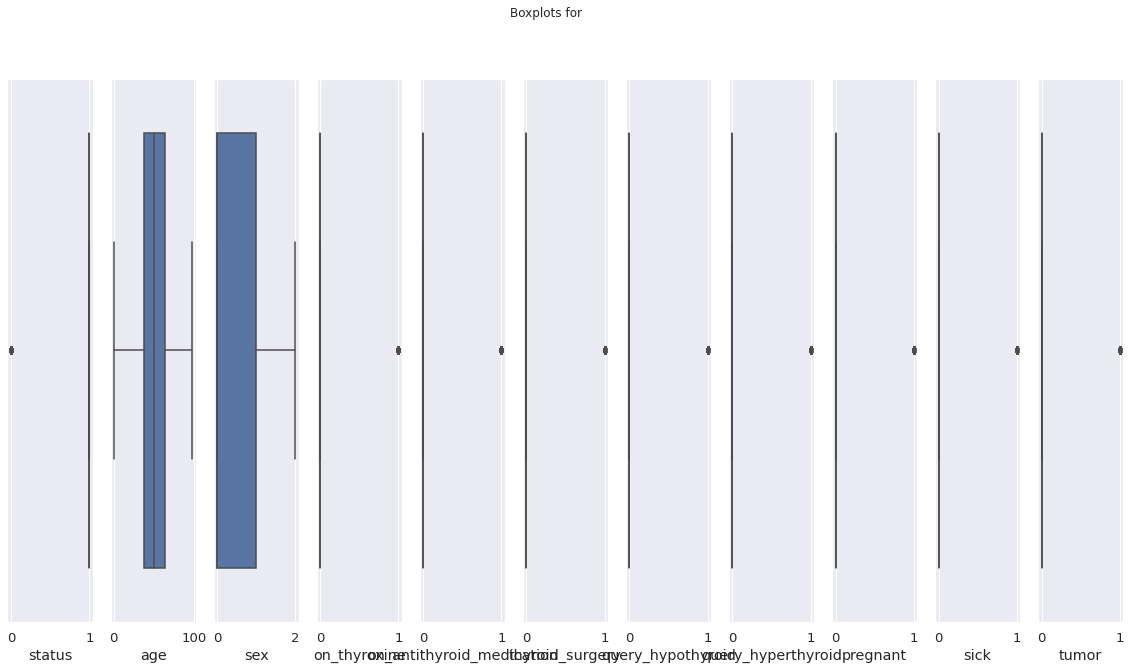

In [23]:
#Checking for outliers
#Plotting boxplots to visualize outliers in the dataset

#Plotting for the first 11 variables
fig, ((ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11)) = plt.subplots(1,11, figsize=(20, 10))
fig.suptitle('Boxplots for ')
sns.boxplot(data['status'], ax=ax1)
sns.boxplot(data['age'], ax=ax2)
sns.boxplot(data['sex'], ax=ax3)
sns.boxplot(data['on_thyroxine'], ax=ax4)
sns.boxplot(data['on_antithyroid_medication'], ax=ax5)
sns.boxplot(data['thyroid_surgery'], ax=ax6)
sns.boxplot(data['query_hypothyroid'], ax=ax7)
sns.boxplot(data['query_hyperthyroid'], ax=ax8)
sns.boxplot(data['pregnant'], ax=ax9)
sns.boxplot(data['sick'], ax=ax10)
sns.boxplot(data['tumor'], ax=ax11)
plt.show()

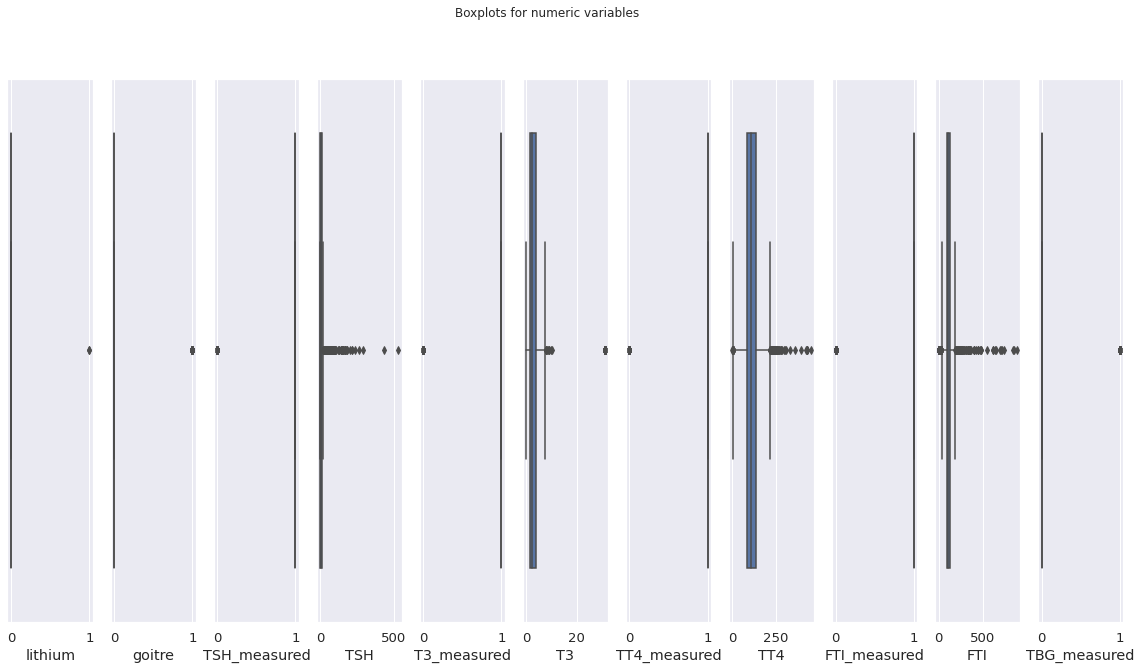

In [24]:
#Checking for outliers in the other remaining variables
#Plotting boxplots to visualize outliers in the dataset
fig, ((ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11)) = plt.subplots(1,11, figsize=(20, 10))
fig.suptitle('Boxplots for numeric variables')
sns.boxplot(data['lithium'], ax=ax1)
sns.boxplot(data['goitre'], ax=ax2)
sns.boxplot(data['TSH_measured'], ax=ax3)
sns.boxplot(data['TSH'], ax=ax4)
sns.boxplot(data['T3_measured'], ax=ax5)
sns.boxplot(data['T3'], ax=ax6)
sns.boxplot(data['TT4_measured'], ax=ax7)
sns.boxplot(data['TT4'], ax=ax8)
sns.boxplot(data['FTI_measured'], ax=ax9)
sns.boxplot(data['FTI'], ax=ax10)
sns.boxplot(data['TBG_measured'], ax=ax11)

Our data is a medical dataset, hence it is very prone to outliers as differnet patients depict different kind of symptoms depending on their hypothyroidism status. We'll therefore not remove this outliers.

## 6.) Exploratory Analysis

#### a.) Statistical Descriptions

In [26]:
#Checking statistical descriptions of the dataset
data.describe()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
count,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000,3163.000000
mean,0.952261,50.991464,0.333228,0.145748,0.017389,0.013279,0.032880,0.076193,0.076826,0.019918,0.031299,0.012646,0.000632,0.031299,0.852039,16.587724,0.780272,8.325103,0.921277,111.144768,0.921593,6.546775,0.921910,116.616156,0.082200
std,0.213248,17.886482,0.518103,0.352909,0.130735,0.114483,0.178351,0.265349,0.266357,0.139740,0.174153,0.111760,0.025142,0.174153,0.355117,33.790323,0.414128,12.066823,0.269348,44.358162,0.268853,19.095650,0.268356,57.990275,0.274713
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.500000,1.000000,85.000000,1.000000,0.860000,1.000000,92.000000,0.000000
50%,1.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.100000,1.000000,107.000000,1.000000,0.980000,1.000000,110.000000,0.000000
75%,1.000000,64.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.600000,1.000000,3.900000,1.000000,138.000000,1.000000,1.110000,1.000000,131.000000,0.000000
max,1.000000,98.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,530.000000,1.000000,31.000000,1.000000,450.000000,1.000000,72.000000,1.000000,881.000000,1.000000


The above simply gives the measures of central tendency and some measures of dispersion of the different columns in the dataset.

b.)Histograms

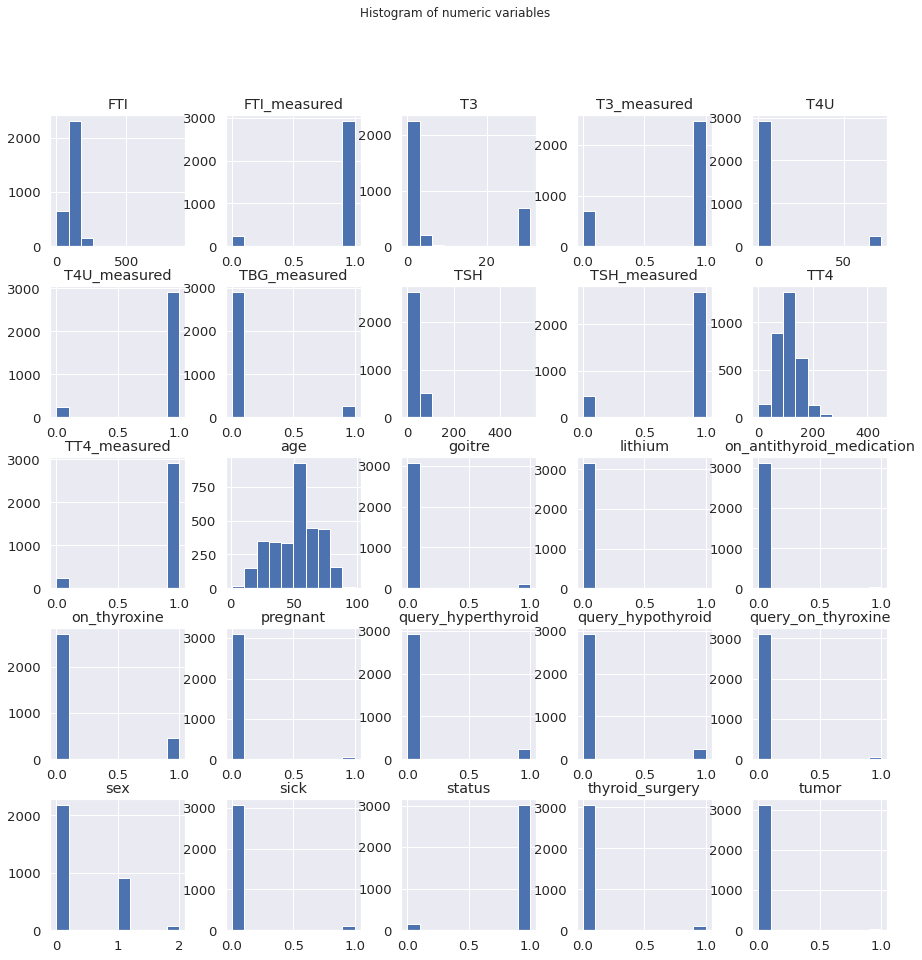

In [27]:
#Plotting the variables on histograms to view their distributions.
data.hist(bins=10, figsize=(15,15))
plt.suptitle("Histogram of numeric variables")
plt.savefig('Hypothyroid Histogram')
plt.show()

Most of the variables are positively skewed i.e. they are skewed to the right.

Generally, our data is very skewed.

#### c.) Correlation

In [28]:
#Checking how our varibales are correlated using a matrix
corrMatrix = data.corr()
corrMatrix

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
status,1.000000,-0.036009,0.023808,0.033652,0.029785,0.013020,-0.041868,-0.047477,0.025616,0.021306,0.023216,0.025340,0.005632,-0.010847,-0.089129,-0.312452,-0.068682,0.082110,-0.065451,0.382218,-0.065308,0.064380,-0.065165,0.320138,0.050812
age,-0.036009,1.000000,-0.007508,0.000648,-0.019953,-0.058942,-0.012205,0.048846,-0.086690,-0.158600,0.064962,-0.062596,-0.021086,-0.036362,0.200006,-0.156219,0.174882,-0.193984,0.125898,-0.111584,0.123632,-0.125809,0.124190,0.003496,-0.128454
sex,0.023808,-0.007508,1.000000,-0.125604,0.035823,-0.026636,-0.036469,-0.076622,-0.061817,-0.082967,0.010552,-0.012721,-0.016181,-0.087589,0.027418,-0.041895,0.098156,-0.100785,0.083792,-0.130162,0.083190,-0.086444,0.084860,0.146661,-0.085856
on_thyroxine,0.033652,0.000648,-0.125604,1.000000,-0.013820,-0.024433,0.029355,0.070498,-0.088877,-0.001168,-0.063956,-0.022691,-0.010390,-0.022790,0.073711,-0.057890,-0.161656,0.162597,0.060856,0.200015,0.060482,-0.059659,0.063447,0.108643,-0.064897
query_on_thyroxine,0.029785,-0.019953,0.035823,-0.013820,1.000000,-0.015432,0.016162,-0.019971,-0.038375,-0.018964,-0.023912,0.049880,-0.003346,0.003869,-0.108053,0.072083,-0.087123,0.085786,0.038886,-0.026665,0.038801,-0.039193,0.038716,-0.007170,-0.039811
on_antithyroid_medication,0.013020,-0.058942,-0.026636,-0.024433,-0.015432,1.000000,-0.005901,-0.033315,0.122105,0.003231,-0.020852,-0.013129,-0.002918,-0.020852,-0.029449,0.021332,-0.018487,0.023041,-0.048139,0.005600,-0.048364,0.048654,-0.048590,-0.013857,0.045730
thyroid_surgery,-0.041868,-0.012205,-0.036469,0.029355,0.016162,-0.005901,1.000000,0.000507,0.020039,-0.013596,-0.033144,-0.020868,-0.004638,-0.022962,0.036890,-0.020643,0.007929,-0.008539,0.007816,-0.018751,0.007613,-0.007339,0.007410,-0.026789,-0.009997
query_hypothyroid,-0.047477,0.048846,-0.076622,0.070498,-0.019971,-0.033315,0.000507,1.000000,-0.020203,-0.015354,-0.051623,-0.032502,0.040181,-0.024248,0.052553,0.003466,-0.020277,0.017092,0.039701,-0.021707,0.039437,-0.039032,0.039171,-0.049459,-0.042562
query_hyperthyroid,0.025616,-0.086690,-0.061817,-0.088877,-0.038375,0.122105,0.020039,-0.020203,1.000000,0.069333,-0.051854,-0.032648,-0.007256,0.043595,-0.137236,0.087684,-0.033276,0.046965,-0.092001,0.164514,-0.092509,0.093323,-0.093020,0.084147,0.103840
pregnant,0.021306,-0.158600,-0.082967,-0.001168,-0.018964,0.003231,-0.013596,-0.015354,0.069333,1.000000,-0.025625,0.004117,-0.003586,0.078337,0.008422,-0.015475,0.031931,-0.017158,-0.000340,0.162851,-0.000508,0.004202,-0.000677,-0.007057,-0.001472


Our variables are correlated with TT4 and FTI having the highest correlation with the status of the patient.

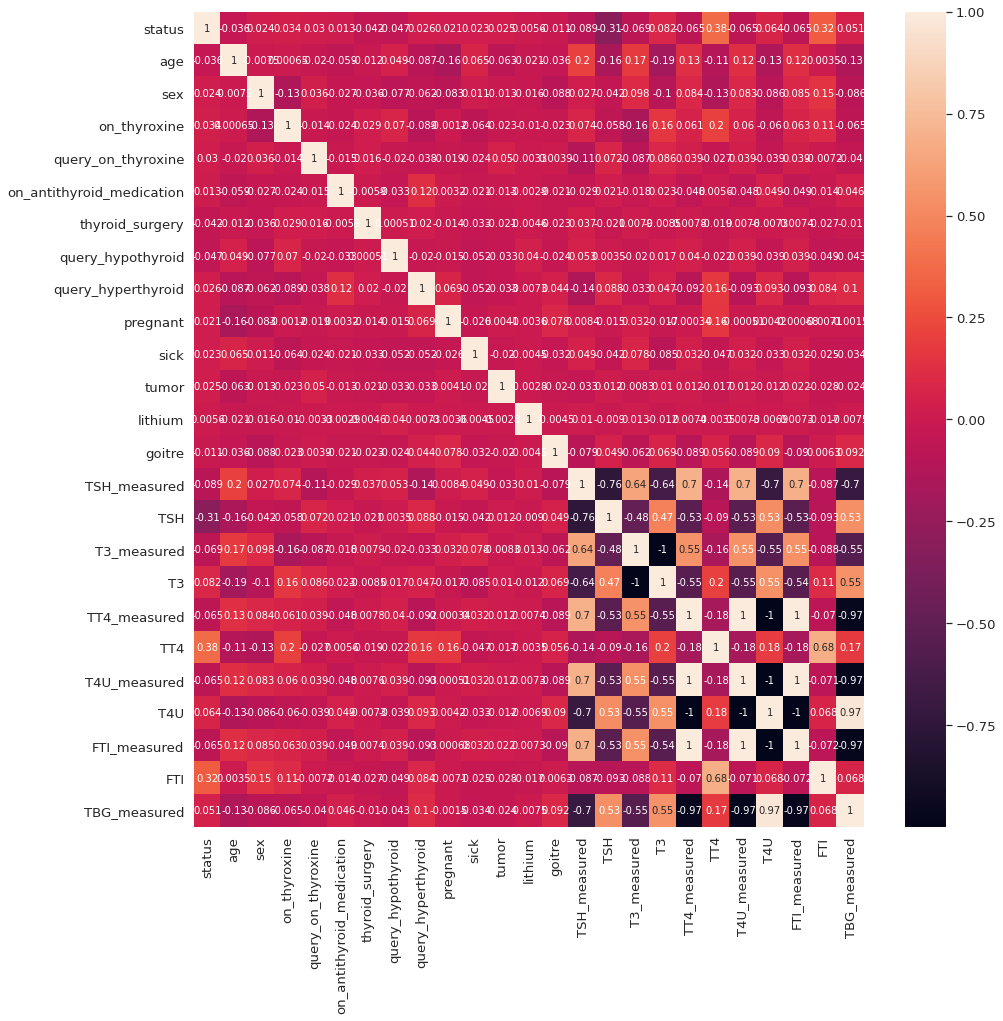

In [29]:
#Plotting visualization of the correlation matrix for better clarity 
plt.figure(figsize=(15, 15))  
sns.heatmap(corrMatrix, annot = True)

## 7.) Implementing the solution

#### a.) Baseline Model

This model is a Multiple Linear Regression model and it's scores will be a benchmark for the other models we create.

In [30]:
#Getting the required columns from the dataset
X = data[['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']].values
y = data['status'].values

#Splitting the dataset into train and test sets
#20% of the data will be used as test, the rest will be the training set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

#Creating a regressor object, and train it using the train data

regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
#Display the intercept / bias
print(regressor.intercept_)

#Display the coefficient
print(regressor.coef_)

15.731321682276489
[-3.94963097e-04  4.99602158e-03 -3.40484230e-03  2.35950552e-02
  2.64769005e-02 -3.48607761e-02 -1.36624148e-02 -3.76706939e-02
  2.14897078e-02  3.91319360e-02  2.85668513e-02 -7.73825448e-14
 -1.35416345e-02 -4.04077759e-01 -4.84206539e-03  1.23162393e-01
  4.09898852e-03  3.99610660e-02  1.87153389e-03 -1.41901513e+01
 -2.00641334e-01 -2.71405156e-01 -4.39399599e-04 -2.11852964e-01]


In [32]:
#Feeding the model the data saved for testing.
y_predict = regressor.predict(X_test)

#We will have the model predict the price based on the independent variables
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predict.flatten()})

#Comparing that to the actual status from the original dataset.
comparison_frame.describe()

,Actual,Predicted
count,633.000000,633.000000
mean,0.958926,0.948095
std,0.198619,0.144011
min,0.000000,-0.588379
25%,1.000000,0.937981
50%,1.000000,0.969117
75%,1.000000,1.000483
max,1.000000,1.290689


In [33]:
#The first metric is MAE - Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predict))

#The second is MSE - Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predict))  

#Finally, the RMSE - Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

Mean Absolute Error: 0.07995334747046584
Mean Squared Error: 0.02848828168390707
Root Mean Squared Error: 0.1687847199360981


### b.) Part 1 : Decision Trees

In this section,we'll build two models i.e. a Random Forest Model and an Ada Boosted tree Model to predict whether a patient's symptoms indicate that they have hypothyroidsm.

We'll try and optimize each of the 2 models and document how we've set up our hyperparameters.

Later on, we'll identify which of the two models built is the most trusted and using that model we'll determine which features are most impactful in influencing the prediction.

We'll not need to do a lot of data cleaning before building these models.

#### i.) Random Forest

In [34]:
#Splitting the independent and dependent variables
test_features = data.columns.to_list()
test_features.remove('status')

X = data[test_features].values
y = data['status'].values

#Training using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Scaling our Data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
StandardScaler()
scaler.transform(X_train)
scaler.transform(X_test)

array([[-1.7246755 , -0.64118158, -0.4099411 , ..., -3.40397777,
         0.25794754,  3.30665424],
       [ 1.61967437, -0.64118158, -0.4099411 , ...,  0.29377395,
         1.12112875, -0.30242049],
       [ 0.33767359,  1.29229803, -0.4099411 , ..., -3.40397777,
         0.25794754,  3.30665424],
       ...,
       [-0.72137054,  1.29229803, -0.4099411 , ...,  0.29377395,
        -0.48192207, -0.30242049],
       [ 1.39671771, -0.64118158, -0.4099411 , ...,  0.29377395,
        -0.34099453, -0.30242049],
       [ 0.39341275,  1.29229803, -0.4099411 , ...,  0.29377395,
        -0.20006698, -0.30242049]])

In [35]:
#Creating a decision tree classifier
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

#Predict based on the model we've trained
y_pred = forest.predict(X_test)

#Comparing that to the actual status from the original dataset
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame.describe()

,Actual,Predicted
count,633.000000,633.000000
mean,0.958926,0.968404
std,0.198619,0.175059
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [36]:
#Calculating the metrics to assess the errors of our model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.022116903633491312
Mean Squared Error: 0.022116903633491312
Root Mean Squared Error: 0.14871752967788066


The RMSE score is not so bad. It's lower than that of our baseline model.

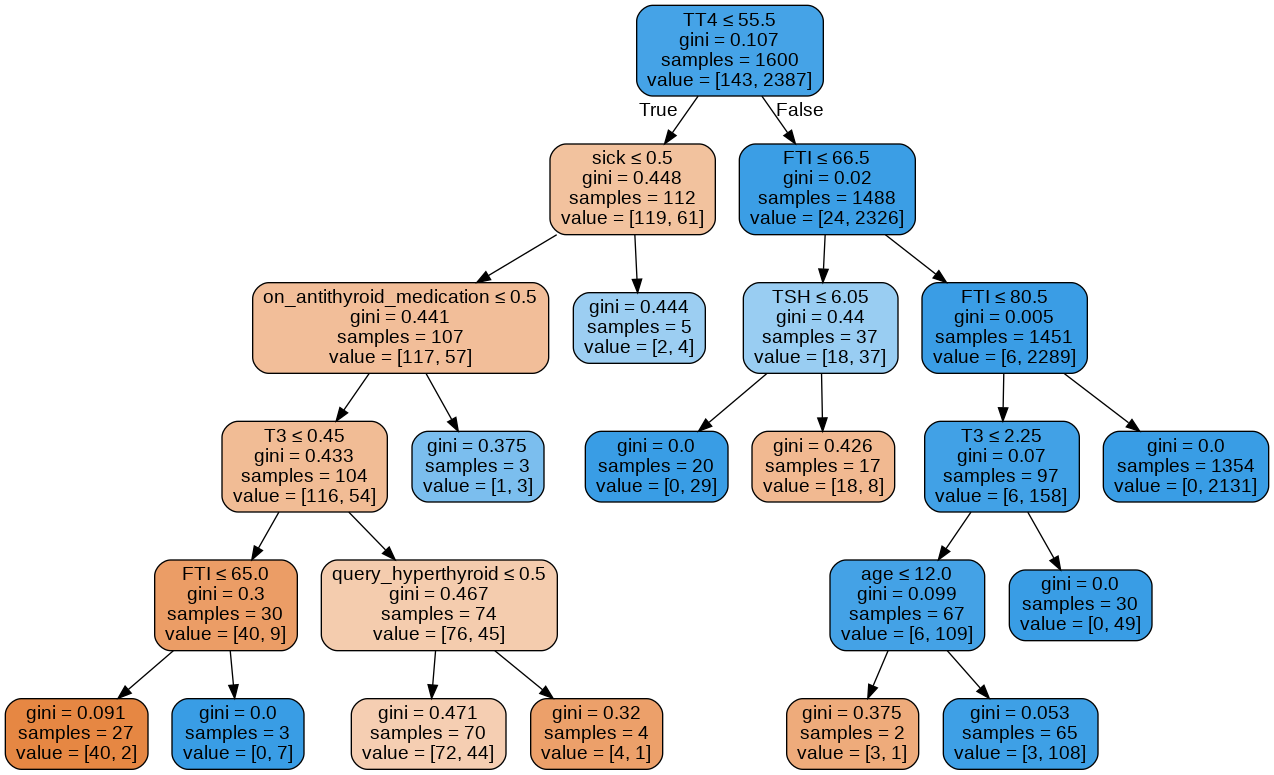

In [37]:
#Visualizing a specific tree from our model
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[75]

export_graphviz(tree, out_file=dot_data, filled=True, rounded=True,special_characters=True,feature_names = test_features)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidsm_forest.png')
Image(graph.create_png())

Getting the most important feautures.

In [38]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances)
print()

#We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

#Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


[('age', 0.02), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.01), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.01), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.07), ('T3_measured', 0.0), ('T3', 0.01), ('TT4_measured', 0.0), ('TT4', 0.76), ('T4U_measured', 0.0), ('T4U', 0.0), ('FTI_measured', 0.0), ('FTI', 0.12), ('TBG_measured', 0.0)]

Variable: TT4                  Importance: 0.76
Variable: FTI                  Importance: 0.12
Variable: TSH                  Importance: 0.07
Variable: age                  Importance: 0.02
Variable: on_antithyroid_medication Importance: 0.01
Variable: sick                 Importance: 0.01
Variable: T3                   Importance: 0.01
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: thyroid_s

Our most important features are TT4, FTI and TSH.

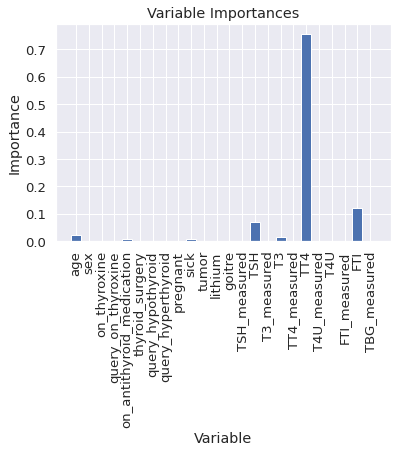

In [39]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');


We'll then build a model with three of the most important features.

In [41]:
from sklearn.model_selection import train_test_split

#Splitting the independent and dependent variables 

X = data[['TT4','FTI','TSH']]
y = data['status'].values

#Training using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
#Scaling our Data
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
StandardScaler()
scaler.transform(X_train)

array([[ 1.4181498 ,  0.55741857, -0.44457789],
       [-0.13869163, -0.23529887, -0.49180645],
       [ 0.01699252,  0.32841131, -0.49180645],
       ...,
       [ 0.46180435,  0.25794754, -0.35897613],
       [-1.27296181,  1.22682441, -0.47291503],
       [-0.42781932,  0.01132434, -0.4239154 ]])

In [42]:
#Creating a decision tree classifier
forest = RandomForestClassifier(n_estimators = 100, random_state=42, min_samples_split = 20, max_depth=5)
forest = forest.fit(X_train, y_train)

#Predict based on the model we've trained
y_pred = forest.predict(X_test)

#Comparing that to the actual status from the original dataset
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame.describe()

,Actual,Predicted
count,633.000000,633.000000
mean,0.958926,0.954186
std,0.198619,0.209246
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


Our model does not do badly as it accurately predicts most values correctly. However, we'll calculate the metrics to assess the errors.

In [43]:
#Calculating the metrics to assess the errors of our model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.017377567140600316
Mean Squared Error: 0.017377567140600316
Root Mean Squared Error: 0.13182400062431848


Our RMSE is 0.1341. Although this is slightly higher than 10% of the mean of the dependent variable, it is lower than the 2 other models.

Therefore, this shows that using the 3 most important variables will predict if a patient has hypothyroidsm or not more accurately than using all the predictor variables.

Visualizing this.

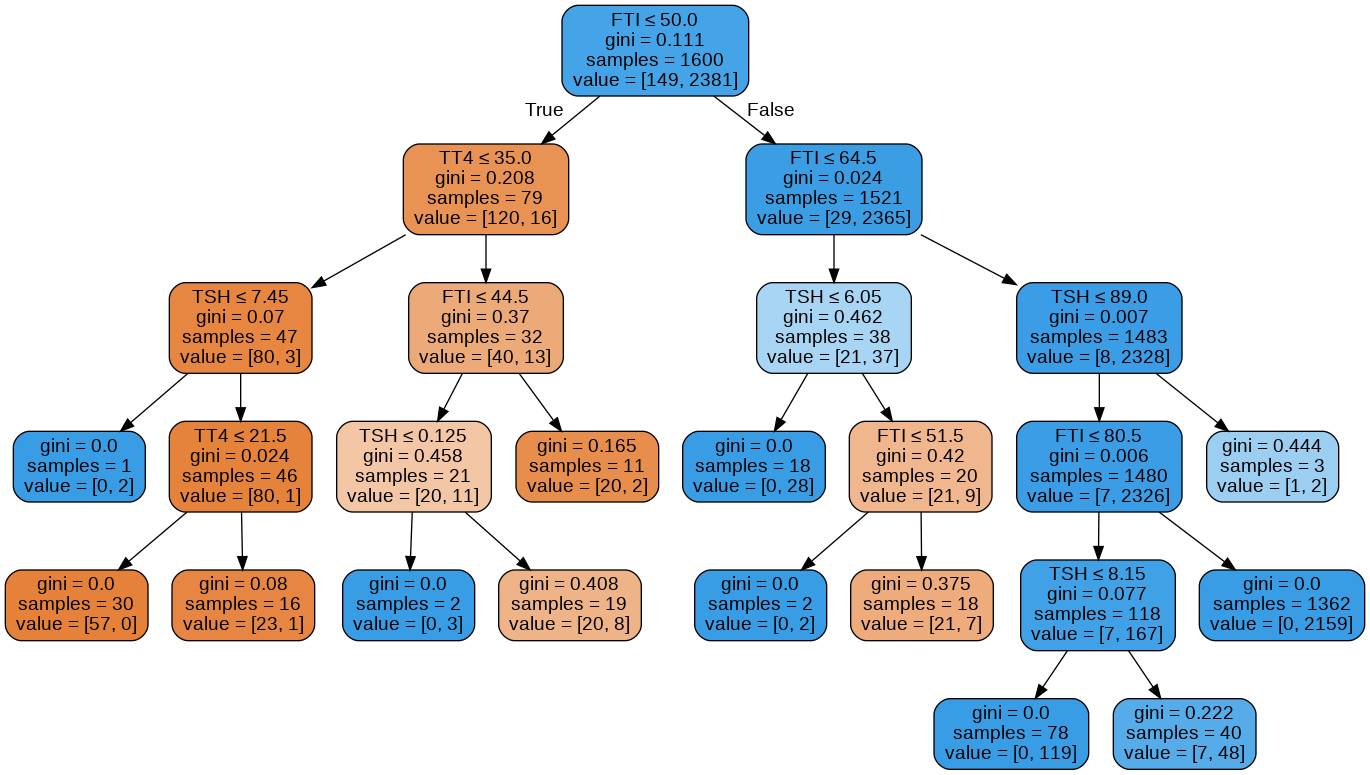

In [45]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
#Pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroidism_forest.png')
Image(graph.create_png())

#### ii.) Ada Boosted Tree

AdaBoost makes predictions by applying multiple decision trees to every sample and combining the predictions made by individual trees just ike Random Forest. However, rather than taking the average of the predictions made by majority of the decision trees in the forest, in the AdaBoost model, every decision tree contributes to the final prediction.

In [46]:
#Splitting our data into training and test sets to evaluate our model’s performance
X = data[test_features]
y = data['status']

#Building and fitting our model to the training set
classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=300)
classifier.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [47]:
#Using our model to predict whether a patient has hypothyroidism or not
predictions = classifier.predict(X_test)

#Evaluating the model using a confusion matrix.
confusion_matrix(y_test, predictions)

array([[ 21,   5],
       [  6, 601]])

The model finished with 5 false positives and 6 false negatives.

We'll then calculate the metrics of our confusion matrix.

In [49]:
#Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9826224328593997

Our model gives an accuracy of 98.26%, this is a good model.

In [50]:
#F1 Score
from sklearn.metrics import f1_score
f1_score(y_test, predictions, average=None)

array([0.79245283, 0.99093157])

The F1 score gives a perfect measure of precision and recall of our model.

The ADA Boosted trees model gives a better accuracy than the random forest model. Hence it will be more reliable in predicting hypothyroidism.

### c.) Part 2 : Support Vector Machine

In [108]:
#Loading the dataset
data = pd.read_csv('hypothyroid.csv')
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [109]:
#Replacing the null values on each column as explained above
data["age"].replace({"?" : 50}, inplace=True)
data["sex"].replace({"?" : 'U'}, inplace=True)
data["TSH"].replace({"?" : 78}, inplace=True)
data["T3"].replace({"?" : 31}, inplace=True)
data["TT4"].replace({"?" : 138}, inplace=True)
data["FTI"].replace({"?" : 131}, inplace=True)
data["T4U"].replace({"?" : 72}, inplace=True)

In [110]:
data.drop('TBG', axis=1, inplace=True)

In [111]:
#Changing the data types of the numerical columns to their respective data types for them not to be encoded while encoding categorical features.
data["age"]= data["age"].astype(int)
data["TSH"]= data["TSH"].astype(float)
data["T3"]= data["T3"].astype(float)
data["TT4"]= data["TT4"].astype(float)
data["FTI"]= data["FTI"].astype(float)
data["T4U"]= data["T4U"].astype(float)

Building our SVM models using the linear, polynomial and rbf kernel functions and then evaluating their performance in order to pick the kernel that performs the best.

#### ii.) Linear Function

In [55]:
#Seperating the target from our data
test_features = data2.columns.to_list()
test_features.remove('status')
X = data2[test_features].values
y = np.where(data['status']=='hypothyroid',0,1)

#Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_test.shape

(633,)

In [56]:
# Let's now build the svm model 
hyper_model = SVC(kernel = 'linear')
# Train the model using the training set
hyper_model.fit(X_train,y_train)

# Predict the response for the test set
y_pred = hyper_model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [57]:
# Now that we have trained our model, let's test how well it can predict the hypothyroidism of a patient

# Checking the accurancy of the model
model_accuracy = accuracy_score(y_test,y_pred)
model_accuracy

0.9778830963665087

We've gotten a classification rate of 97.78%. This is a pretty good accuracy score 

#### iii.) Polynomial Function

In [58]:
#We need to reduce the feature by applying a reduction algorithm 

#Seperating the target from our data
test_features = data2.columns.to_list()
test_features.remove('status')
X = data2[test_features].values
y = np.where(data['status']=='hypothyroid',0,1)


In [59]:
#Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [60]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='scale')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [61]:
# making prediction
y_pred = polyclassifier.predict(X_test)

In [62]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))

0.9731437598736177


We've gotten a classification rate of 97.31%, lower than the linear kernel. This is a pretty good accuracy score.

Optimization: Parameter tuning

We'll use the gamma parameter to improve the perfomance.
We'll try playing around with the value of gamma and notice what happens.

In [64]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='auto')
# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [67]:
# making prediction
y_pred = polyclassifier.predict(X_test)

In [68]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))

0.9731437598736177


We've gotten a classification rate of 97.31%. This is the same as the other value of gamma hence no difference when the gamma is changed.

#### iv.) Radial Basis Function(rbf)

In [69]:
#Building the model 
rbfclassifier = SVC(kernel='rbf')
#Training the model using the training set
rbfclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [70]:
# making prediction
y_pred = rbfclassifier.predict(X_test)

In [71]:
# Model Evaluation
print( accuracy_score(y_test, y_pred))

0.976303317535545


We've gotten a classification rate of 97.63%, higher than the linear function and the polynomial function as well. This is a pretty good accuracy score.

Comparison of the Kernel Performance

When we compare the performance of the three kernels, it clear that linear kernel performs the best.
We'll therefore select the linear kernel as it is the one that performs the best.

#### v.) Visualization

From our correlation matrix, TT4 and FTI are the variables with a high correlation to the status of the patient. e'll thereforeuse these two features to build the model.

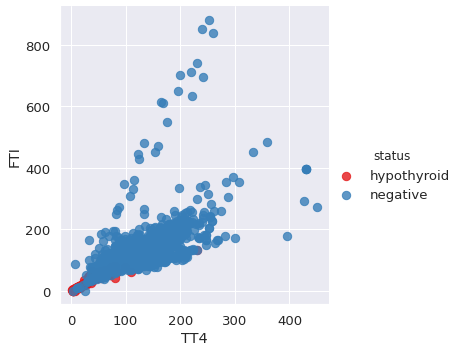

In [72]:
# Plot two ingredients
sns.lmplot('TT4', 'FTI', data=data, hue='status',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [73]:
# Specify the input for the model

X = data2[['TT4','FTI']].values
y = np.where(data['status']=='hypothyroid',0,1)

#Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Building the model 
polyclassifier = SVC(kernel='linear',degree=3,gamma='auto')

# Training the model using the training set
polyclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

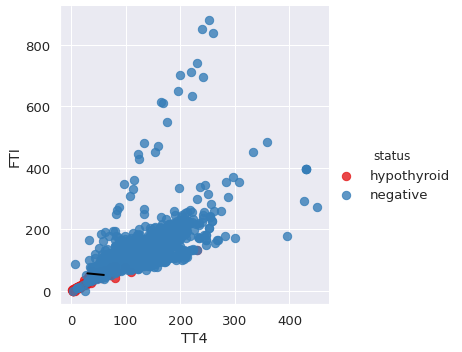

In [75]:
# Get the separating hyperplane
w = polyclassifier.coef_[0] #get the first coefficient of our model
a = -w[0] / w[1]
# Get the x values of our hyperplane.  
xx = np.linspace(30, 60)
yy = a * xx - (polyclassifier.intercept_[0]) / w[1]

# Plot the hyperplane
sns.lmplot('TT4', 'FTI', data=data, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');


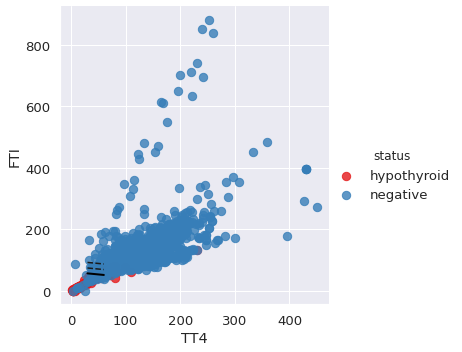

In [76]:
# Plot the parallels to the separating hyperplane that pass through the support vectors
b = polyclassifier.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = polyclassifier.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# Look at the margins and support vectors
sns.lmplot('TT4', 'FTI', data=data, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--') #'k--' indicates that we want to draw a black dotted line
plt.plot(xx, yy_up, 'k--')
plt.scatter(polyclassifier.support_vectors_[:, 0], polyclassifier.support_vectors_[:, 1],s=80, facecolors='none');

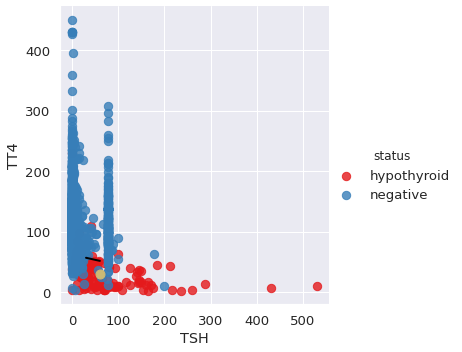

In [77]:
# Plot the point to visually see where the point lies
sns.lmplot('TSH', 'TT4', data=data, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(60, 30, 'yo', markersize='9');

In [78]:
# We can also go an exra mile to create a function that helps us predict when the patient has hypothyroidism or not
def positive_or_negative(TSH, FTI):
    if(polyclassifier.predict([[TSH, FTI]]))==0:
        print('The patient has hypothyroidsm')
    else:
        print('The patient does not have hypothyroidsm')

# Predict if 60 parts flour and 30 parts butter
positive_or_negative(60, 30)

The patient has hypothyroidsm


## 8.) Challenging the solution

#### a.) Random Forest Model.

We'll challenge our Random Forest Model by building a Gradient Boosted Model to see if it does a better job than the AdaBoosted Model. 

In [94]:
#Splitting our data into training and test sets to evaluate our model’s performance
X = data[test_features]
y = data['status']

#Building and fitting our model to the training set
classifier = GradientBoostingRegressor(n_estimators=300,learning_rate=0.1, max_depth=2)
classifier.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=2,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=300,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [107]:
#Using our model to predict whether a patient has hypothyroidism or not
predictions = classifier.predict(X_test)
#Accuracy
accuracy_score(y_test, predictions.round(), normalize=True)

0.9699842022116903

The Gradient Boosted model has a lower accuracy than the Ada boosted model hence the Ada Boosted model is still the best.

#### b.) Support Vector Machine Model.

We'll challenge our SVM model by building a model using the sigmoid function which is more suited to binary classification problems because the sigmoid function returns two values, 0 and 1. This is exactly what we need as our dataset has 2 values to predict i.e whether the patient has hypothyroidism(0) or not(1)

In [112]:
#Seperating the target from our data
test_features = data2.columns.to_list()
test_features.remove('status')
X = data2[test_features].values
y = np.where(data['status']=='hypothyroid',0,1)

#Split the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y_test.shape

(633,)

In [113]:
# Building the model 
sigclassifier = SVC(kernel='sigmoid')
# Training the model using the training set
sigclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [114]:
# Predict the response for the test set
y_pred = hyper_model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [115]:
# Now that we have trained our model, let's test how well it can predict the hypothyroidism of a patient

# Checking the accurancy of the model
model_accuracy = accuracy_score(y_test,y_pred)
model_accuracy

0.9778830963665087

Our sigmoid function builds a model with an accuracy the same as the linear function i.e. 97.68% This model is recommended more compared to the linear function as it is more suited to binary classification problems because the sigmoid function returns two values, 0 and 1, as in our case with our dataset.

## 9.) Follow up questions

### a). Did we have the right data?

Yes, we had the right data

### b). Do we need other data to answer our question?

No, the dataset had a wide range of variables required in predicting if a patient has hypothyroidism or not.

### c). Did we have the right question?

Yes, we had the right question.